<h1>TASK 6. ALGORITHMS ON GRAPHS. PATH SEARCH ALGORITHMS ON WEIGHTED GRAPHS</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Environment configuration</a></li>
    <li><a href='#002'>Appendix to Section I</a></li>
    <li><a href='#003'>Appendix to Section II</a></li>
    </ol>
</ul>

<a name='001'></a>

<h2>Environment configuration</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx import nx
import pandas as pd
import timeit
import warnings
import random

In [2]:
warnings.filterwarnings(action='ignore')
random.seed(0)

<a name='002'></a>

<h2>Appendix to Section I</h2>

Implementing the random adjacency matrix and graph.

In [3]:
graph = nx.dense_gnm_random_graph(n=100, m=500)

for (u, v) in graph.edges():
    graph.edges[u, v]['weight'] = np.random.randint(0, 100)

In [4]:
adjacency_matrix = nx.adjacency_matrix(graph).todense()

for row in adjacency_matrix[:3]:
    print(row)

[[ 0  0  0 55  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  4  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  6  0  0  0  0  0
   0  0  0  0]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 63  0  0  0  0  0  0  0
   0  0  0  0 16  0  0  0 77  0  0  0  0  0  0  0  0 81 98  0  0  0  0  0
   0 45  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48  0  0  0  0  0  0  0
   0  0 41  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0 49  0
   0  0 39  0]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 58  0  0  0  0  0  0  0  0
   0 14  0  0  0 19  0  0  0  0  0  0  0  0  0 56 91  0  0  0  0 99  0  0
   0  0  0 55  0  0  0 53  0 26 32  0  0  0  0  0  0  0  0  0  0  0  0 69
   0  0  0  0  0  0  0  0  0  0 39  2 11  0  0  0  0  0  0 24  0  0  0  0
   0  0  0  0]]


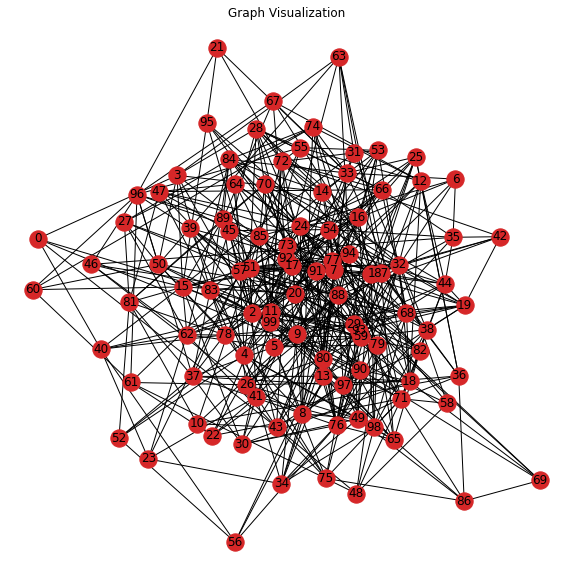

In [5]:
plt.figure(figsize=(10, 10))
plt.title('Graph Visualization')
nx.draw(graph, with_labels=True, node_color='tab:red')

Implementing the Dijkstra's and Bellman-Ford algorithms.

In [6]:
def dijkstra_path(graph, source, target):
    return nx.dijkstra_path(G=graph, source=source, target=target)

def bellman_ford_path(graph, source, target):
    return nx.bellman_ford_path(G=graph, source=source, target=target)

In [7]:
df = pd.DataFrame()

source = 0
target = 10

print('Dijkstra Algorithm:', dijkstra_path(graph, source, target))
print('Bellman-Ford Algorithm:', bellman_ford_path(graph, source, target))

Dijkstra Algorithm: [0, 43, 19, 54, 18, 30, 88, 10]
Bellman-Ford Algorithm: [0, 43, 19, 54, 18, 30, 88, 10]


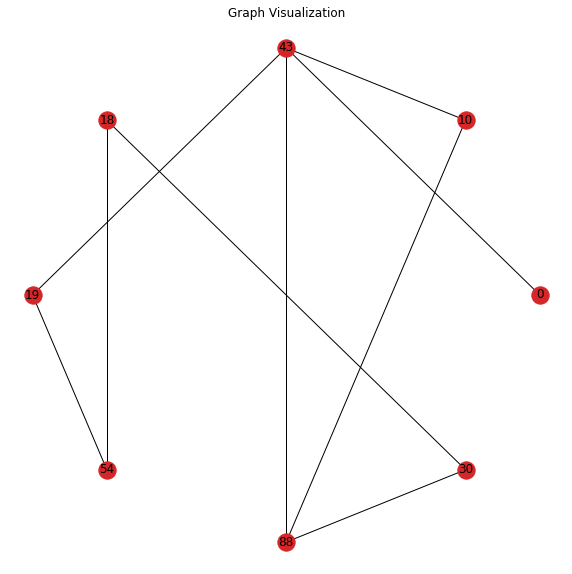

In [8]:
plt.figure(figsize=(10, 10))
plt.title('Graph Visualization')
nx.draw_shell(graph.subgraph(dijkstra_path(graph, source, target)), with_labels=True, node_color='tab:red')

In [9]:
for i in range(0, 10):
    df.loc[i, 'dijkstra_path'] = timeit.timeit(
        'dijkstra_path(graph, source, target)',
        setup='from __main__ import dijkstra_path, graph, source, target',
        number=1
    )
    
    df.loc[i, 'bellman_ford_path'] = timeit.timeit(
        'bellman_ford_path(graph, source, target)',
        setup='from __main__ import bellman_ford_path, graph, source, target',
        number=1
    )

In [10]:
df

,dijkstra_path,bellman_ford_path
0,0.000571,0.001323
1,0.000495,0.001241
2,0.000499,0.001566
3,0.000833,0.001790
4,0.000489,0.001685
5,0.000621,0.001247
6,0.000481,0.001581
7,0.000505,0.001218
8,0.000478,0.001217
9,0.000473,0.001212


In [11]:
df.mean()

dijkstra_path        0.000544
bellman_ford_path    0.001408
dtype: float64

<a name='003'></a>

<h2>Appendix to Section II</h2>

Implementing the cell grid.

In [12]:
graph = nx.generators.lattice.grid_2d_graph(10, 20)

obstacles = [(np.random.randint(0, 10), np.random.randint(0, 20)) for i in range(40)]
graph.remove_nodes_from(obstacles)

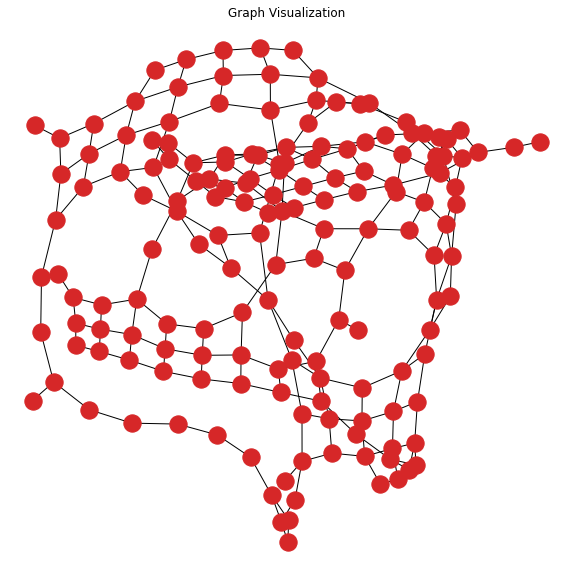

In [13]:
plt.figure(figsize=(10, 10))
plt.title('Graph Visualization')
nx.draw(graph, node_color='tab:red')

Implementing the A* algorithm.

In [14]:
def astar_path(graph, source, target):
    return nx.astar_path(G=graph, source=source, target=target)

In [15]:
graph.nodes

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 14), (0, 17), (0, 18), (0, 19), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 19), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 7), (2, 8), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 16), (2, 17), (2, 19), (3, 0), (3, 2), (3, 5), (3, 6), (3, 7), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 18), (3, 19), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 13), (4, 14), (4, 15), (4, 16), (4, 19), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 14), (5, 15), (5, 16), (5, 17), (5, 19), (6, 0), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 12), (6, 13), (6, 14), (6, 16), (6, 17), (6, 18), (6, 19), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (

In [16]:
source = (0, 4)
target = (9, 6)

print('A* Algorithm:', astar_path(graph, source, target))

A* Algorithm: [(0, 4), (1, 4), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (9, 6)]


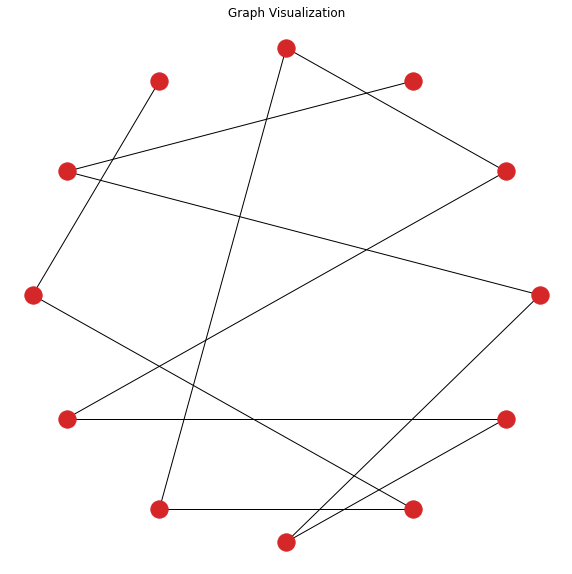

In [17]:
plt.figure(figsize=(10, 10))
plt.title('Graph Visualization')
nx.draw_shell(graph.subgraph(astar_path(graph, source, target)), node_color='tab:red')

In [18]:
source = (6, 2)
target = (8, 7)

for i in range(0, 5):
    df.loc[i, 'A*'] = timeit.timeit(
        'astar_path(graph, source, target)',
        setup='from __main__ import astar_path, graph, source, target',
        number=1
    )

In [20]:
df['A*'].head()

0    0.000252
1    0.000280
2    0.000258
3    0.000260
4    0.000241
Name: A*, dtype: float64

In [21]:
df['A*'].head().mean()

0.00025829999999587016

In [22]:
df.to_csv('time.csv', index=False)